# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               976 non-null    object
 1   Make_Year          976 non-null    int64 
 2   Color              976 non-null    object
 3   Body_Type          976 non-null    object
 4   Mileage_Run        976 non-null    int64 
 5   No_of_Owners       976 non-null    object
 6   Seating_Capacity   976 non-null    int64 
 7   Fuel_Type          976 non-null    object
 8   Transmission       976 non-null    object
 9   Transmission_Type  976 non-null    object
 10  Price              976 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.0+ KB
None

Missing Values in Each Column:
Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type     

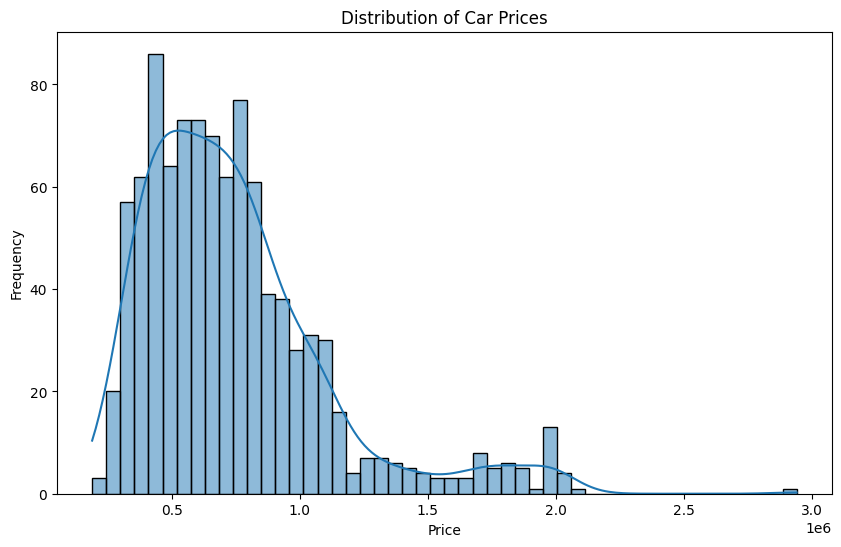

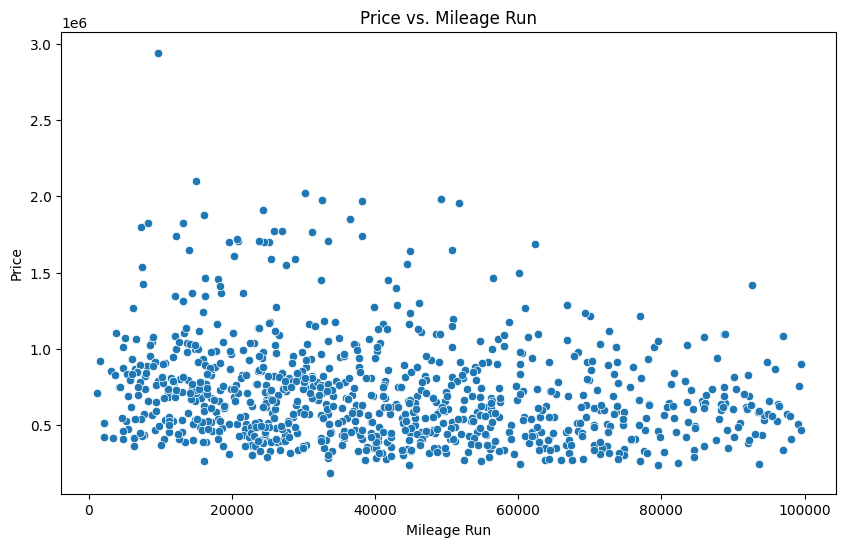

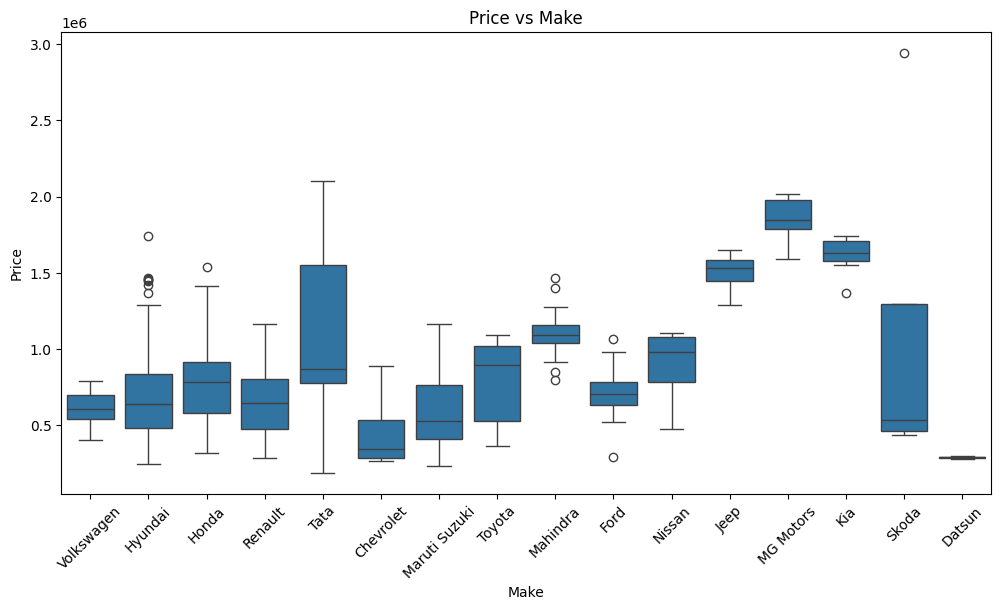

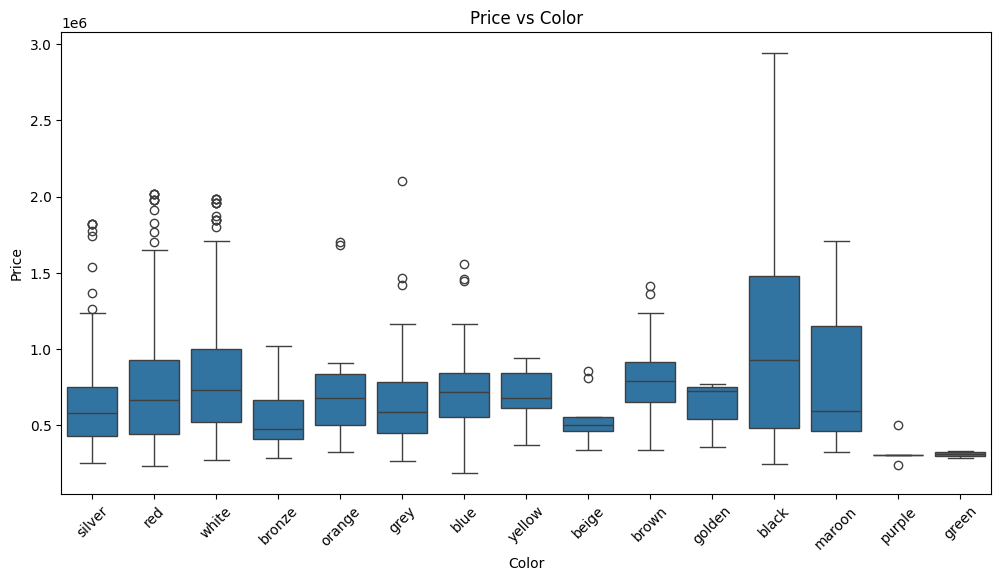

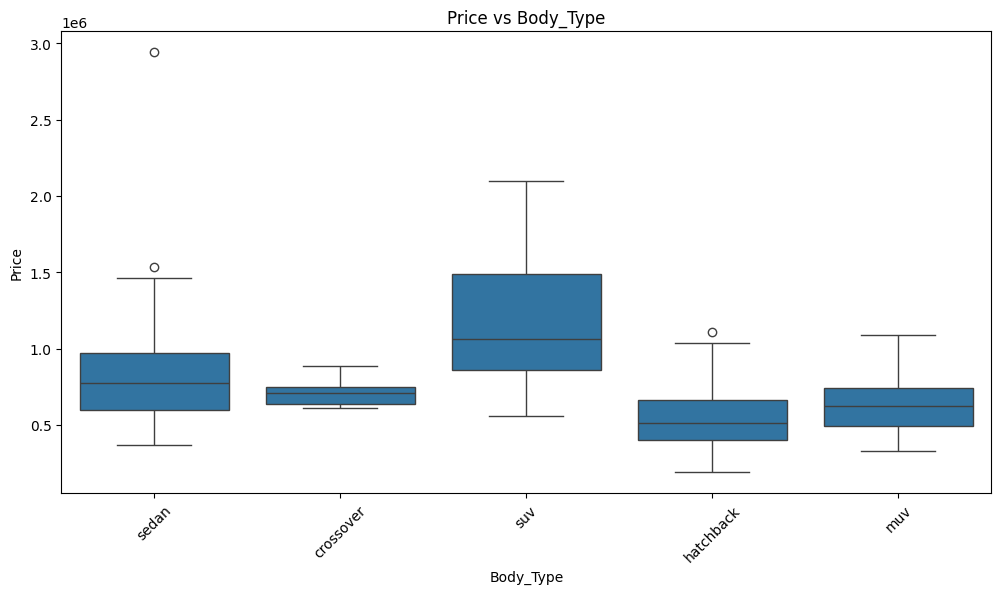

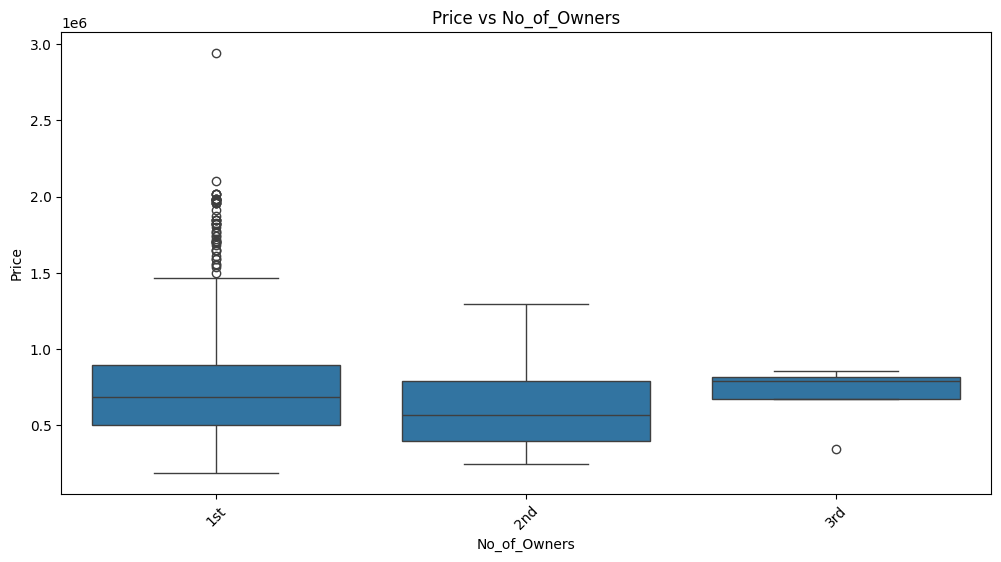

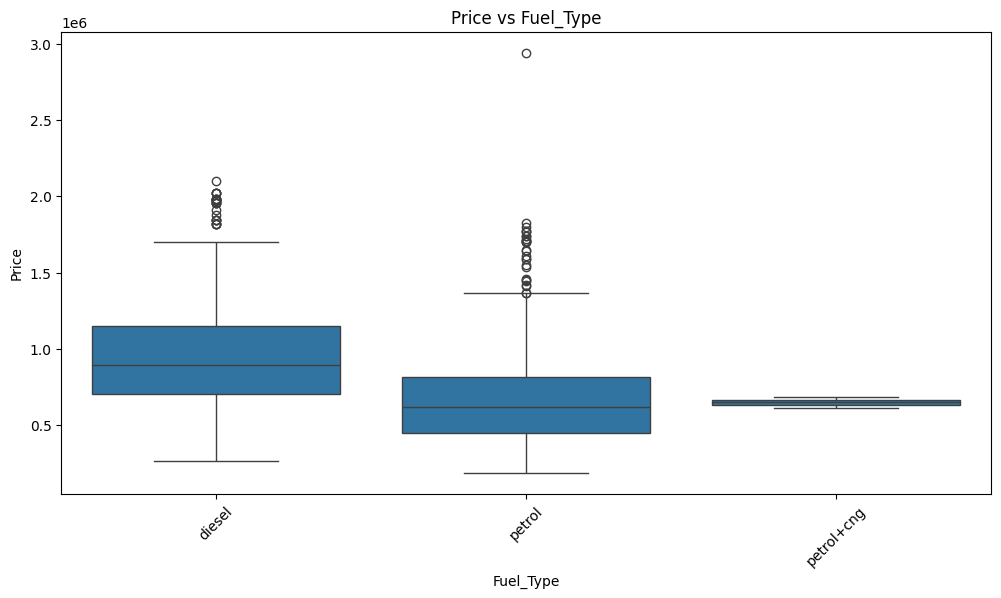

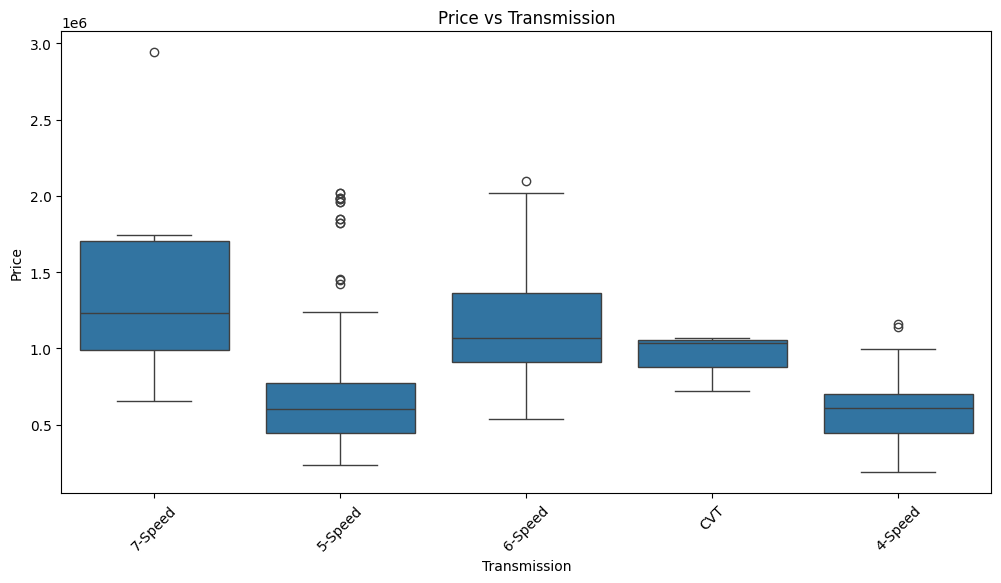

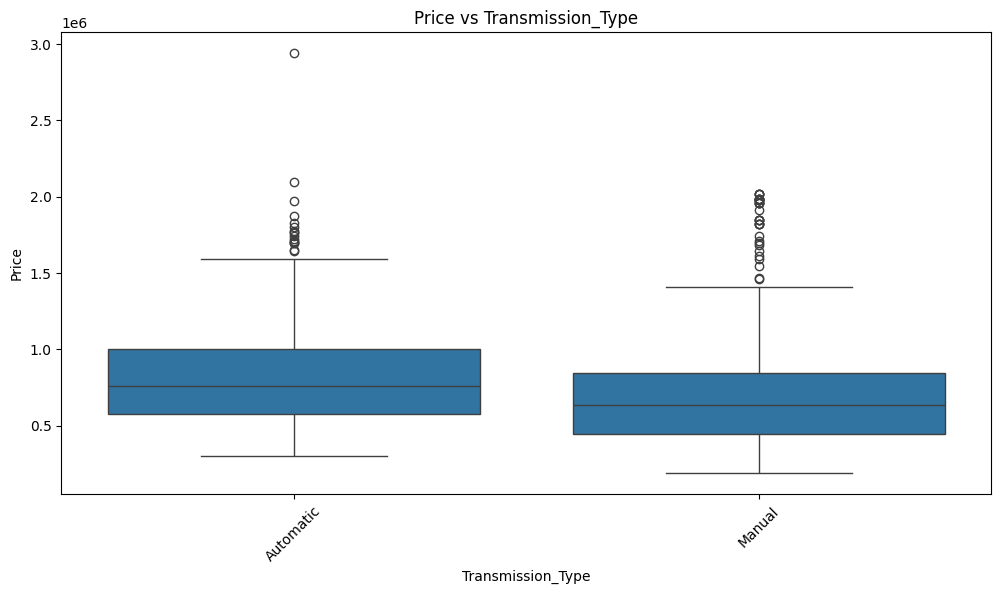

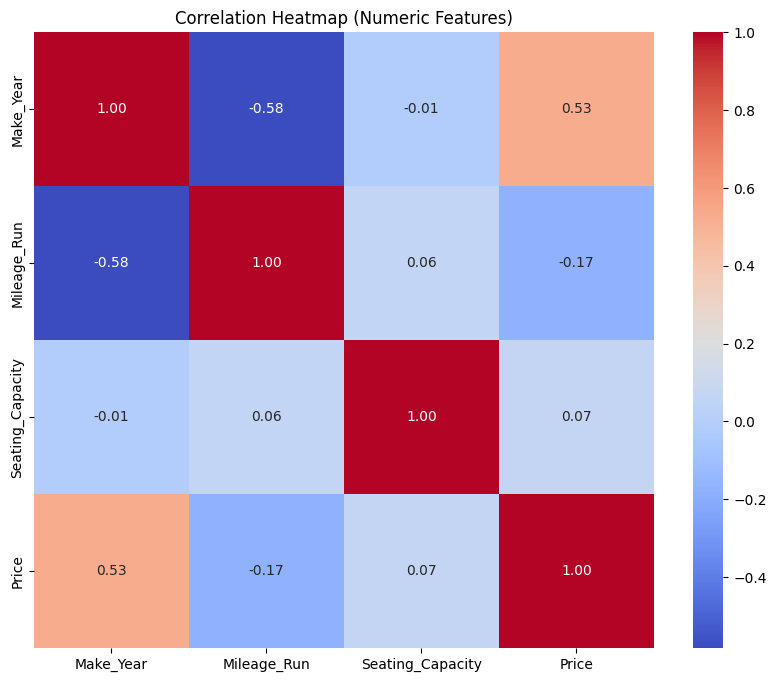

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cars = pd.read_csv('cars_hw.csv')
if 'Unnamed: 0' in cars.columns:
    cars = cars.drop(columns=['Unnamed: 0'])

print("Dataset Information:")
print(cars.info())
print("\nMissing Values in Each Column:")
print(cars.isnull().sum())
print("\nFirst Five Rows:")
print(cars.head())

print("\nSummary Statistics:")
print(cars.describe())


plt.figure(figsize=(10,6))
sns.histplot(cars['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=cars, x='Mileage_Run', y='Price')
plt.title('Price vs. Mileage Run')
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.show()

categorical_cols = cars.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=cars, x=col, y='Price')
    plt.xticks(rotation=45)
    plt.title(f'Price vs {col}')
    plt.show()

numeric_cols = cars.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,8))
sns.heatmap(cars[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

EDA and visualization of the dataset cars

In [16]:
cars['No_of_Owners'] = cars['No_of_Owners'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth Owner': 4,
    'Fifth Owner': 5,
    'Sixth Owner': 6
})

cars['No_of_Owners'] = pd.to_numeric(cars['No_of_Owners'], errors='coerce')

categorical_cols = cars.select_dtypes(include=['object']).columns
cars_encoded = pd.get_dummies(cars, columns=categorical_cols, drop_first=True)

print("Transformed Dataset Columns:")
print(cars_encoded.columns)

print("\nFirst Five Rows of Transformed Data:")
print(cars_encoded.head())

Transformed Dataset Columns:
Index(['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Price',
       'Make_Datsun', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jeep',
       'Make_Kia', 'Make_MG Motors', 'Make_Mahindra', 'Make_Maruti Suzuki',
       'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota',
       'Make_Volkswagen', 'Color_black', 'Color_blue', 'Color_bronze',
       'Color_brown', 'Color_golden', 'Color_green', 'Color_grey',
       'Color_maroon', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Body_Type_hatchback',
       'Body_Type_muv', 'Body_Type_sedan', 'Body_Type_suv', 'Fuel_Type_petrol',
       'Fuel_Type_petrol+cng', 'Transmission_5-Speed', 'Transmission_6-Speed',
       'Transmission_7-Speed', 'Transmission_CVT', 'Transmission_Type_Manual'],
      dtype='object')

First Five Rows of Transformed Data:
   Make_Year  Mileage_Run  No_of_Owners  Seating_Capacity   Price  \
0     

In [17]:
# 3.
X = cars_encoded.drop(columns=['Price'])
y = cars_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Features Shape: (780, 44)
Training Target Shape: (780,)
Test Features Shape: (196, 44)
Test Target Shape: (196,)


In [18]:
def train_and_evaluate(features, model_name="Model"):
    X_train_sub = X_train[features]
    X_test_sub = X_test[features]

    model = LinearRegression()
    model.fit(X_train_sub, y_train)

    y_train_pred = model.predict(X_train_sub)
    y_test_pred = model.predict(X_test_sub)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"--- {model_name} ---")
    print(f"Train RMSE: {train_rmse:.2f}, Train R²: {train_r2:.3f}")
    print(f"Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.3f}")
    print()

    return {
        "Model": model_name,
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    }


model1_features = ['Mileage_Run']

model2_features = ['Make_Year']

model3_features = ['Mileage_Run', 'Make_Year']

model4_features = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

results = []

results.append(train_and_evaluate(model1_features, model_name="Model 1: Mileage_Run"))
results.append(train_and_evaluate(model2_features, model_name="Model 2: Make_Year"))
results.append(train_and_evaluate(model3_features, model_name="Model 3: Mileage_Run + Make_Year"))
results.append(train_and_evaluate(model4_features, model_name="Model 4: Mileage_Run + Make_Year + Seating_Capacity"))

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test_RMSE"))

--- Model 1: Mileage_Run ---
Train RMSE: 369437.23, Train R²: 0.022
Test RMSE: 330349.98, Test R²: 0.049

--- Model 2: Make_Year ---
Train RMSE: 317443.71, Train R²: 0.278
Test RMSE: 288232.56, Test R²: 0.276

--- Model 3: Mileage_Run + Make_Year ---
Train RMSE: 310695.04, Train R²: 0.308
Test RMSE: 283873.73, Test R²: 0.297

--- Model 4: Mileage_Run + Make_Year + Seating_Capacity ---
Train RMSE: 309338.37, Train R²: 0.314
Test RMSE: 284546.95, Test R²: 0.294

                                               Model     Train_RMSE  \
2                   Model 3: Mileage_Run + Make_Year  310695.036967   
3  Model 4: Mileage_Run + Make_Year + Seating_Cap...  309338.372957   
1                                 Model 2: Make_Year  317443.710381   
0                               Model 1: Mileage_Run  369437.232061   

       Test_RMSE  Train_R2   Test_R2  
2  283873.728209  0.308418  0.297407  
3  284546.951907  0.314445  0.294070  
1  288232.563579  0.278048  0.275664  
0  330349.982458  0.022

The result shows that the best model that fits the most is model 4: Mileage_Run + Make_Year+Seating cap

<Figure size 1200x800 with 0 Axes>

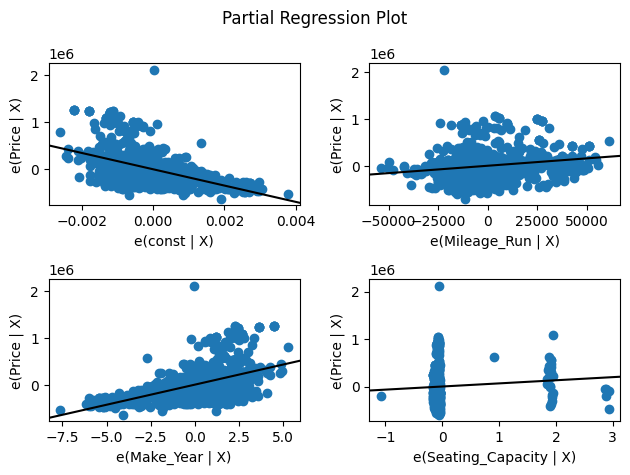

In [22]:
import statsmodels.api as sm
X_partial = X_train[['Mileage_Run', 'Make_Year', 'Seating_Capacity']]
X_partial = sm.add_constant(X_partial)
y_partial = y_train

ols_model = sm.OLS(y_partial, X_partial).fit()

fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(ols_model)
plt.tight_layout()
plt.show()

Yes, the last graph shows significant nonlinearity.

In [23]:
X_train_complex = X_train[['Mileage_Run', 'Make_Year', 'Seating_Capacity']].copy()
X_test_complex = X_test[['Mileage_Run', 'Make_Year', 'Seating_Capacity']].copy()

X_train_complex['log_Mileage_Run'] = np.log1p(X_train_complex['Mileage_Run'])
X_test_complex['log_Mileage_Run'] = np.log1p(X_test_complex['Mileage_Run'])

X_train_complex['Make_Year_x_Mileage_Run'] = X_train_complex['Make_Year'] * X_train_complex['Mileage_Run']
X_test_complex['Make_Year_x_Mileage_Run'] = X_test_complex['Make_Year'] * X_test_complex['Mileage_Run']

X_train_complex['Make_Year_Squared'] = X_train_complex['Make_Year'] ** 2
X_test_complex['Make_Year_Squared'] = X_test_complex['Make_Year'] ** 2

X_train_complex['log_Seating_Capacity'] = np.log1p(X_train_complex['Seating_Capacity'])
X_test_complex['log_Seating_Capacity'] = np.log1p(X_test_complex['Seating_Capacity'])
model_complex = LinearRegression()
model_complex.fit(X_train_complex, y_train)

y_train_pred_complex = model_complex.predict(X_train_complex)
y_test_pred_complex = model_complex.predict(X_test_complex)

train_rmse_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
test_rmse_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
train_r2_complex = r2_score(y_train, y_train_pred_complex)
test_r2_complex = r2_score(y_test, y_test_pred_complex)

print("--- Complex Model ---")
print(f"Train RMSE: {train_rmse_complex:.2f}, Train R²: {train_r2_complex:.3f}")
print(f"Test RMSE: {test_rmse_complex:.2f}, Test R²: {test_r2_complex:.3f}")



--- Complex Model ---
Train RMSE: 302381.65, Train R²: 0.345
Test RMSE: 281690.74, Test R²: 0.308


The complex model would do better than simple ones because it better reflects how car features affect value.

In simple models especially 1 variable models, there are high RMSE and low R^2 which shows underfitting. In complex model, there is no significant overfit. By adding transformations, we are able to greatly improved model performance.